In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.1.0


In [3]:
df = pd.read_csv('D:\\document\\SSHS\\과제연구\\archive_new\\covid-19-all.csv')
df

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,China,Anhui,31.825700,117.226400,1.0,NaN,NaN,2020-01-22
1,China,Beijing,40.182400,116.414200,14.0,NaN,NaN,2020-01-22
2,China,Chongqing,30.057200,107.874000,6.0,NaN,NaN,2020-01-22
3,China,Fujian,26.078900,117.987400,1.0,NaN,NaN,2020-01-22
4,China,Gansu,35.751800,104.286100,NaN,NaN,NaN,2020-01-22
...,...,...,...,...,...,...,...,...
983414,Vietnam,NaN,14.058324,108.277199,1381.0,1225.0,35.0,2020-12-09
983415,West Bank and Gaza,NaN,31.952200,35.233200,102992.0,76893.0,890.0,2020-12-09
983416,Yemen,NaN,15.552727,48.516388,2079.0,1383.0,606.0,2020-12-09
983417,Zambia,NaN,-13.133897,27.849332,18062.0,17295.0,364.0,2020-12-09


In [23]:
df_korea = df[df['Country/Region'].isin(['South Korea'])]
df_korea

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
37,South Korea,NaN,36.000000,128.000000,1.0,NaN,NaN,2020-01-22
75,South Korea,NaN,36.000000,128.000000,1.0,NaN,NaN,2020-01-23
121,South Korea,NaN,36.000000,128.000000,2.0,NaN,NaN,2020-01-24
162,South Korea,NaN,36.000000,128.000000,2.0,NaN,NaN,2020-01-25
208,South Korea,NaN,36.000000,128.000000,3.0,NaN,NaN,2020-01-26
...,...,...,...,...,...,...,...,...
963902,South Korea,NaN,35.907757,127.766922,37546.0,29128.0,545.0,2020-12-05
967878,South Korea,NaN,35.907757,127.766922,38161.0,29301.0,549.0,2020-12-06
971854,South Korea,NaN,35.907757,127.766922,38755.0,29650.0,552.0,2020-12-07
975830,South Korea,NaN,35.907757,127.766922,39432.0,30177.0,556.0,2020-12-08


In [24]:
df_korea = df_korea.drop(['Country/Region','Province/State','Latitude','Longitude'], axis=1)
df_korea

,Confirmed,Recovered,Deaths,Date
37,1.0,NaN,NaN,2020-01-22
75,1.0,NaN,NaN,2020-01-23
121,2.0,NaN,NaN,2020-01-24
162,2.0,NaN,NaN,2020-01-25
208,3.0,NaN,NaN,2020-01-26
...,...,...,...,...
963902,37546.0,29128.0,545.0,2020-12-05
967878,38161.0,29301.0,549.0,2020-12-06
971854,38755.0,29650.0,552.0,2020-12-07
975830,39432.0,30177.0,556.0,2020-12-08


In [41]:
df_korea_new = pd.read_csv('D:\\document\\SSHS\\과제연구\\data\\dataset_korea.csv')
df_korea_new

,Date,Confirmed,Recovered,Deaths,Social Distancing Level
0,2020-01-22,1,0,0,0
1,2020-01-23,1,0,0,0
2,2020-01-24,2,0,0,0
3,2020-01-25,2,0,0,0
4,2020-01-26,3,0,0,0
...,...,...,...,...,...
318,2020-12-05,37546,29128,545,3
319,2020-12-06,38161,29301,549,3
320,2020-12-07,38755,29650,552,3
321,2020-12-08,39432,30177,556,4


In [60]:
df_korea_new = df_korea_new.drop('Date', axis=1)
df_korea_new

,Confirmed,Recovered,Deaths,Social Distancing Level
0,1,0,0,0
1,1,0,0,0
2,2,0,0,0
3,2,0,0,0
4,3,0,0,0
...,...,...,...,...
318,37546,29128,545,3
319,38161,29301,549,3
320,38755,29650,552,3
321,39432,30177,556,4


In [153]:
df_korea_new.head(10)

,Confirmed,Recovered,Deaths,Social Distancing Level
0,1,0,0,0
1,1,0,0,0
2,2,0,0,0
3,2,0,0,0
4,3,0,0,0
5,4,0,0,0
6,4,0,0,0
7,4,0,0,0
8,4,0,0,0
9,11,0,0,0


In [154]:
data = df_korea_new.to_numpy()
data

array([[    1,     0,     0,     0],
       [    1,     0,     0,     0],
       [    2,     0,     0,     0],
       ...,
       [38755, 29650,   552,     3],
       [39432, 30177,   556,     4],
       [40098, 30637,   564,     4]], dtype=int64)

In [168]:
x = np.array([data[i+j] for i in range(len(data)-10) for j in range(3)])

x_train = x[:60].reshape(-1,3,4)

x_test = x[60:].reshape(-1,3,4)

y = np.array([data[i+3] for i in range(len(data)-3)])

y_train = y[:20].reshape(-1,4)

y_test = y[20:].reshape(-1,4)

In [156]:
len(x)

939

In [157]:
x

array([[    1,     0,     0,     0],
       [    1,     0,     0,     0],
       [    2,     0,     0,     0],
       ...,
       [34201, 27653,   526,     3],
       [34652, 27885,   526,     3],
       [35163, 28065,   526,     3]], dtype=int64)

In [158]:
x_train

array([[[    1,     0,     0,     0],
        [    1,     0,     0,     0],
        [    2,     0,     0,     0]],

       [[    1,     0,     0,     0],
        [    2,     0,     0,     0],
        [    2,     0,     0,     0]],

       [[    2,     0,     0,     0],
        [    2,     0,     0,     0],
        [    3,     0,     0,     0]],

       ...,

       [[22504, 19310,   367,     3],
        [22657, 19543,   372,     3],
        [22783, 19771,   377,     3]],

       [[22657, 19543,   372,     3],
        [22783, 19771,   377,     3],
        [22893, 19970,   378,     3]],

       [[22783, 19771,   377,     3],
        [22893, 19970,   378,     3],
        [22975, 20158,   383,     3]]], dtype=int64)

In [159]:
y

array([[    2,     0,     0,     0],
       [    3,     0,     0,     0],
       [    4,     0,     0,     0],
       ...,
       [38755, 29650,   552,     3],
       [39432, 30177,   556,     4],
       [40098, 30637,   564,     4]], dtype=int64)

In [93]:
y_train

array([[   12,     0,     0,     0],
       [   15,     0,     0,     0],
       [   15,     0,     0,     0],
       [   16,     0,     0,     0],
       [   19,     0,     0,     0],
       [   23,     0,     0,     0],
       [   24,     1,     0,     0],
       [   24,     1,     0,     0],
       [   25,     3,     0,     0],
       [   27,     3,     0,     0],
       [   28,     3,     0,     0],
       [   28,     7,     0,     0],
       [   28,     7,     0,     0],
       [   28,     7,     0,     0],
       [   28,     9,     0,     0],
       [   29,     9,     0,     0],
       [   30,    10,     0,     0],
       [   31,    12,     0,     0],
       [   31,    12,     0,     0],
       [  104,    16,     1,     0],
       [  204,    16,     2,     0],
       [  433,    16,     2,     0],
       [  602,    18,     6,     0],
       [  833,    18,     8,     0],
       [  977,    22,    10,     0],
       [ 1261,    22,    12,     0],
       [ 1766,    22,    13,     0],
 

In [160]:
x_test

array([[[22893, 19970,   378,     3],
        [22975, 20158,   383,     3],
        [23045, 20248,   385,     3]],

       [[22975, 20158,   383,     3],
        [23045, 20248,   385,     3],
        [23106, 20441,   388,     3]],

       [[23045, 20248,   385,     3],
        [23106, 20441,   388,     3],
        [23216, 20650,   388,     3]],

       [[23106, 20441,   388,     3],
        [23216, 20650,   388,     3],
        [23341, 20832,   393,     3]],

       [[23216, 20650,   388,     3],
        [23341, 20832,   393,     3],
        [23455, 20978,   395,     3]],

       [[23341, 20832,   393,     3],
        [23455, 20978,   395,     3],
        [23516, 21166,   399,     3]],

       [[23455, 20978,   395,     3],
        [23516, 21166,   399,     3],
        [23611, 21248,   401,     3]],

       [[23516, 21166,   399,     3],
        [23611, 21248,   401,     3],
        [23661, 21292,   406,     3]],

       [[23611, 21248,   401,     3],
        [23661, 21292,   406,     

In [178]:
model = keras.Sequential() 

model.add(layers.SimpleRNN(8,input_shape = (3,4)))

model.add(layers.SimpleRNN(8,input_shape = (-1,4)))

model.add(layers.Dense(4))

model.compile(optimizer='adam',loss='mse')

model.fit(x_train,y_train,epochs=300)

ValueError: Input 0 of layer simple_rnn_30 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 8]

In [171]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_24 (SimpleRNN)    (None, 8)                 104       
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 36        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [173]:
y_hat = model.predict(x_test)

In [174]:
y_hat

array([[ 3.701,  0.695, -0.006,  0.199],
       [ 3.701,  0.695, -0.006,  0.199],
       [ 3.686,  0.717, -0.02 ,  0.19 ],
       ...,
       [ 2.868,  1.98 , -1.08 , -0.626],
       [ 2.868,  1.98 , -1.08 , -0.626],
       [ 2.868,  1.98 , -1.08 , -0.626]], dtype=float32)

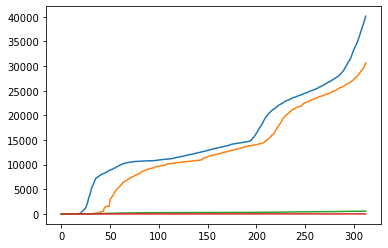

In [145]:
plt.plot(y)

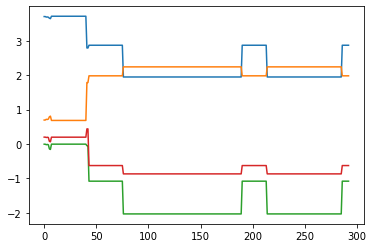

In [175]:
plt.plot(y_hat)

In [106]:
y_train += y_hat

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [54]:
def movement(n, m, days, beta, gamma, p_stop):
    class TwoWayDict(dict):
        """two-way dictionary, 개체의 id와 위치를 관리하기 위해 필요"""

        def __setitem__(self, key, value):
            if key in self:
                del self[key]
            if value in self:
                del self[value]
            dict.__setitem__(self, key, value)
            dict.__setitem__(self, value, key)

        def __delitem__(self, key):
            dict.__delitem__(self, self[key])
            dict.__delitem__(self, key)

        def __len__(self):
            return dict.__len__(self) // 2

        def __clear__(self):
            dict.clear(self)
    
    id_coordindex = TwoWayDict()
    grid_list = []
    active, removed, total_infected = 1, 0, 1
    ret_array = np.zeros([3, days+1])

    def scatter_uniform(n, m, density=0.6):
        """공간 생성 후 개체 배치"""
        grid_list.clear()
        id_coordindex.clear()
        def create_grid(rows, columns):
            """ 공간(grid)를 생성하고 Susceptible 상태의 개체를 배치"""
            grid_init = np.zeros([rows + 2, columns + 2])
            grids_init = np.array(grid_init)
            # 경계 설정; -1로 표현
            for i in range(rows):
                grids_init[i + 1][0] = -1
                grids_init[i + 1][columns + 1] = -1
            for i in range(columns + 2):
                grids_init[0][i] = -1
                grids_init[rows + 1][i] = -1
            return grids_init
        grid = create_grid(n, m)
        for i in range(len(grid)):
            grid_list.append([])
        for i in range(len(grid)):
            grid_list[i] = list(grid[i])
        for i in range(1, len(grid) - 1):
            for j in range(1, len(grid[0]) - 1):
                grid_list[i][j] = []  # 빈 리스트로 초기화(개체가 없는 칸)
        num = int(n * m * density)  # 개체의 수
        k = 0
        for c in random.sample(range(1, n * m + 1), num):
            i, j = c // m, c % m
            if j == 0:
                grid_list[i][m].append([k, 0])
                id_coordindex[k] = ((i, m), 0)
            else:
                grid_list[i + 1][j].append([k, 0])
                id_coordindex[k] = ((i + 1, j), 0)
            k += 1
        # 초기 감염자 위치 설정: 중앙
        mid_r, mid_c = (n + 1) // 2, (m + 1) // 2
        if ((mid_r, mid_c), 0) not in id_coordindex:
            grid_list[mid_r][mid_c].append([k, 0])
            id_coordindex[k] = ((mid_r, mid_c), 0)
        return grid_list
    
    def move_uniform(p_stop):
        """개체들이 1칸 이내에서 무작위로 이동"""
        for i in range(len(id_coordindex)):
            if random.uniform(0, 1) <= p_stop:
                continue
            r_before, c_before = id_coordindex[i][0][0], id_coordindex[i][0][1]
            index_before = id_coordindex[i][1]
            id_status = grid_list[r_before][c_before][index_before]  # type: list
            r_movement, c_movement = random.randint(-1, 1), random.randint(-1, 1)
            r_after, c_after = r_before + r_movement, c_before + c_movement
            how_many_in_before = len(grid_list[r_before][c_before])
            if (type(grid_list[r_after][c_after]) == list) and (r_movement != 0 or c_movement != 0):
                if len(grid_list[r_before][c_before]) > 1:  # 기존에 있던 위치에 다른 개체가 있다면
                    # 칸에 있는 개체 중 자신보다 늦게 온 개체들에 대해서 index를 1씩 줄임
                    for j in range(index_before + 1, how_many_in_before):
                        id_for_reduce = grid_list[r_before][c_before][j][0]
                        lst_temp = list(id_coordindex[id_for_reduce])
                        lst_temp[1] -= 1
                        id_coordindex[id_for_reduce] = tuple(lst_temp)
                grid_list[r_after][c_after].append(id_status)  # 목적지에 개체 append
                grid_list[r_before][c_before].remove(id_status)  # 시작지에서 개체 remove
                index_after = len(grid_list[r_after][c_after]) - 1
                id_coordindex[i] = ((r_after, c_after), index_after)  # two-way dict update
    
    def find_susceptible(id_num):
        """개체의 id가 주어지면 그 개체 주변의 Susceptible 상태인 개체 탐색"""
        susceptible = []
        close_contact = []
        # 입력된 식별번호를 가지는 (감염된) 개체의 좌표 저장
        r = id_coordindex[id_num][0][0]
        c = id_coordindex[id_num][0][1]
        # 상하좌우 대각선으로 한 칸 이내의 공간에 대해서:
        for a in range(-1, 2):
            for b in range(-1, 2):
                # 제자리를 확인
                if a == 0 and b == 0:
                    if len(grid_list[r][c]) > 1:
                        for i in set(range(len(grid_list[r][c]))) - {id_coordindex[id_num][1]}:
                            if grid_list[r + a][c + b][i][1] == 0:
                                id_close_contact = grid_list[r][c][i][0]
                                close_contact.append(id_close_contact)
                elif type(grid_list[r + a][c + b]) == list:
                    for i in range(len(grid_list[r + a][c + b])):
                        id_susceptible = grid_list[r + a][c + b][i][0]
                        if grid_list[r + a][c + b][i][1] == 0:
                            susceptible.append(id_susceptible)
        return susceptible, close_contact

    def infect(beta, beta_close_contact):
        nonlocal active, total_infected
        """감염된 개체의 이웃이 beta 또는 beta_close_contact의 확률로 감염"""
        for i in range(len(id_coordindex)):
            r, c = id_coordindex[i][0][0], id_coordindex[i][0][1]  # 처음의 x, y좌표
            index = id_coordindex[i][1]
            status = grid_list[r][c][index][1]
            if status == 1:
                susceptible, close_contact = find_susceptible(i)
                for id_person in susceptible:
                    if random.uniform(0, 1) <= beta:
                        r_temp, c_temp = id_coordindex[id_person][0][0], id_coordindex[id_person][0][1]
                        index_temp = id_coordindex[id_person][1]
                        grid_list[r_temp][c_temp][index_temp][1] = 1
                        active += 1
                        total_infected += 1
                for id_person in close_contact:
                    if random.uniform(0, 1) <= beta_close_contact:
                        r_temp, c_temp = id_coordindex[id_person][0][0], id_coordindex[id_person][0][1]
                        index_temp = id_coordindex[id_person][1]
                        grid_list[r_temp][c_temp][index_temp][1] = 1  # 상태를 infected로 변경
                        active += 1
                        total_infected += 1

    def recover(gamma):
        """감염된 개체가 gamma의 확률로 회복"""
        nonlocal removed, active
        for i in range(len(id_coordindex)):
            r, c = id_coordindex[i][0][0], id_coordindex[i][0][1]
            index = id_coordindex[i][1]
            status = grid_list[r][c][index][1]
            if status == 1 and random.uniform(0, 1) <= gamma:
                r_temp, c_temp = id_coordindex[i][0][0], id_coordindex[i][0][1]
                index_temp = id_coordindex[i][1]
                grid_list[r_temp][c_temp][index_temp][1] = 2
                removed += 1
                active -= 1
    
    grid_list = scatter_uniform(n, m, 0.6)
    mid_r, mid_c = (n + 1) // 2, (m + 1) // 2
    grid_list[mid_r][mid_c][0][1] = 1  # 최초 감염자
    for i in range(days + 1):
        ret_array[0][i] = total_infected
        ret_array[1][i] = active
        ret_array[2][i] = removed
        move_uniform(p_stop)
        if(i): recover(gamma)
        infect(beta, beta)
    
    return ret_array

def movement_avg(n, m, days, beta, gamma, p_stop, repeat):
    ret = np.zeros([3, days+1])
    for i in range(repeat):
        temp = movement(n, m, days, beta, gamma, p_stop)
        ret = np.add(ret, temp)
    return ret / repeat


In [55]:
L = movement_avg(100,100,10,0.5,0.3,0,10)
L

array([[  1. ,   8.1,  18.9,  35.5,  59.4,  89.2, 126. , 164.8, 211.9,
        259.5, 307.9],
       [  1. ,   8.1,  16.7,  28. ,  44.3,  62. ,  80.7,  94.9, 112.2,
        129.3, 137.5],
       [  0. ,   0. ,   2.2,   7.5,  15.1,  27.2,  45.3,  69.9,  99.7,
        130.2, 170.4]])